In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch

from PIL import Image
from tqdm.notebook import tqdm

import timm
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

from utils.dataset import ImageDataset
from utils.helpers import show_image, convert_numpy

In [25]:
PATH = "dataset/"

In [2]:
df = pd.read_csv(PATH + "captions.txt")

In [3]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [4]:
img_list = df["image"].unique()

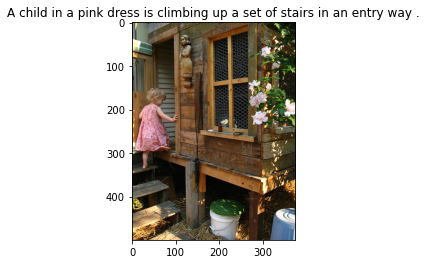

In [5]:
image_arr = np.asarray(Image.open(PATH + "Images/" + df.image[0]))
show_image(image_arr, df.caption[0])

In [6]:
inception = timm.create_model('inception_v4', pretrained=True, num_classes=0, global_pool='')
inception.eval()

InceptionV4(
  (features): Sequential(
    (0): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (2): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (3): Mixed3a(
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv): BasicConv2d(
        (conv): Conv2d(64, 96, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, mom

In [7]:
config = resolve_data_config({}, model=inception)
transform = create_transform(**config)

/Users/kad99kev/miniforge3/envs/py38/lib/python3.8/site-packages/torchvision/transforms/transforms.py:280: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [15]:
dataset = ImageDataset(path="dataset/Images/", img_list=img_list, transform=transform)
print(len(dataset))

8091


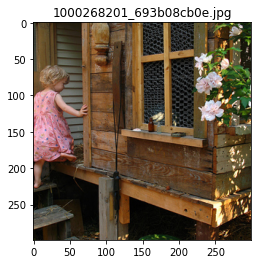

In [13]:
img, path = dataset[0]
show_image(convert_numpy(img), cap)

In [137]:
with torch.no_grad():
    outs = inception(img.unsqueeze(0))
print(outs.shape)

torch.Size([1, 1536, 8, 8])


In [23]:
imageloader = torch.utils.data.DataLoader(dataset, batch_size=2)

In [28]:
os.mkdir(PATH + "embeddings/")

In [29]:
for img, path in tqdm(imageloader):
    features = inception(img)
    
    for f, p in zip(features, path):
        f = f.detach().cpu().numpy()
        np.save(PATH + "embeddings/" + p, f)

  0%|          | 0/4046 [00:00<?, ?it/s]

KeyboardInterrupt: 